In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Importing example image

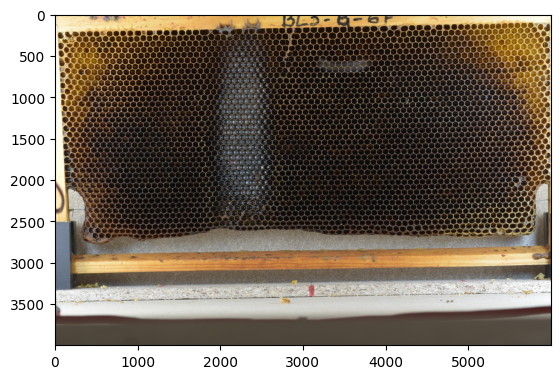

In [12]:
beecomb = cv2.imread("BEE_HOPE GIMONDE 2016_03_23 BL3_G FILE0722.jpg", cv2.IMREAD_COLOR)

beecomb = cv2.cvtColor(beecomb, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(beecomb)
plt.show()



Plotting test circle to see if the size is right, get dimensions from the image

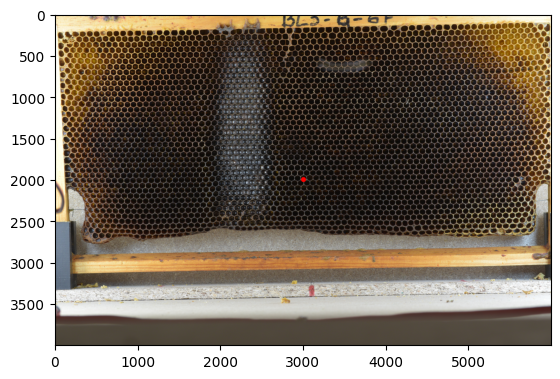

In [3]:

#extract dimensions of the image
height, width, _ = beecomb.shape
# Calculate the center of the image
center = (width//2, height//2)

# Draw a circle at the center of the image
cv2.circle(beecomb, center, 30, (255, 0, 0), -1)  # The color is set to red (RGB: 255, 0, 0)

# Display the image
plt.imshow(beecomb)
plt.show()

Importing csv file, converting it to panda dataframe, creating new tables grouped by class name

In [4]:
#FOR LABELS_TRAIN.CSV
df = pd.read_csv('labels_train.csv')

#give column name: id, x,y,class name, image name
df.columns = ['id', 'x', 'y', 'class name', 'image name']

# Display the first few rows of the DataFrame
grouped = df.groupby('class name')
tables = {}
for name, group in grouped:
    tables[name] = group

print(tables.keys())

# Group by 'image name' and 'class name'
grouped = df.groupby(['image name', 'class name'])

# Create a nested dictionary where the first key is the image name, 
# the second key is the class name, and the value is the corresponding DataFrame
tables = {}
for (image_name, class_name), group in grouped:
    if image_name not in tables:
        tables[image_name] = {}
    tables[image_name][class_name] = group

print(tables['BEE_HOPE GIMONDE 2016_03_23 BL1_G FILE0634.JPG']['honey'])

# Iterate over the image names
for image_name in tables.keys():
    # Print the class names for each image
    print(f"For image '{image_name}', the class names are: {list(tables[image_name].keys())}")

dict_keys(['capped', 'dontcare', 'eggs', 'honey', 'larves', 'nectar', 'pollen'])
        id     x     y class name  \
6840  6841  1258  1386      honey   
6841  6842  1329  1388      honey   
6842  6843  1405  1390      honey   
6843  6844  1475  1390      honey   
6844  6845  1547  1386      honey   
6845  6846  1844  1263      honey   
6846  6847  1919  1268      honey   
6847  6848  1991  1264      honey   
6848  6849  1212  1323      honey   
6849  6850  1290  1323      honey   
6850  6851  1356  1323      honey   
6851  6852  1432  1325      honey   
6852  6853  1506  1323      honey   
6853  6854  1582  1326      honey   

                                          image name  
6840  BEE_HOPE GIMONDE 2016_03_23 BL1_G FILE0634.JPG  
6841  BEE_HOPE GIMONDE 2016_03_23 BL1_G FILE0634.JPG  
6842  BEE_HOPE GIMONDE 2016_03_23 BL1_G FILE0634.JPG  
6843  BEE_HOPE GIMONDE 2016_03_23 BL1_G FILE0634.JPG  
6844  BEE_HOPE GIMONDE 2016_03_23 BL1_G FILE0634.JPG  
6845  BEE_HOPE GIMONDE 2016_03_23

In [5]:
#FOR LABELS_TEST.CSV
df = pd.read_csv('labels_test.csv')
print(df.head())

# Group by 'image name' and 'class name'
grouped = df.groupby(['image name', 'class name'])

# Create a nested dictionary where the first key is the image name, 
# the second key is the class name, and the value is the corresponding DataFrame
tables = {}
for (image_name, class_name), group in grouped:
    if image_name not in tables:
        tables[image_name] = {}
    tables[image_name][class_name] = group

print(tables['BEE_HOPE GIMONDE 2016_03_23 BL1_G FILE0634.JPG']['eggs'])

# Iterate over the image names
for image_name in tables.keys():
    # Print the class names for each image
    print(f"For image '{image_name}', the class names are: {list(tables[image_name].keys())}")

      id     x     y  radius  class class name    image name
0  17940  1402   658      15      0     capped  DSC_0818.JPG
1  18069  1369   724      15      0     capped  DSC_0818.JPG
2  18071  2509  1222      17      0     capped  DSC_0818.JPG
3  18087  1618   787      15      0     capped  DSC_0818.JPG
4  18112  1339   910      15      0     capped  DSC_0818.JPG
        id    x     y  radius  class class name  \
9956  7471  307  1144      17      1       eggs   

                                          image name  
9956  BEE_HOPE GIMONDE 2016_03_23 BL1_G FILE0634.JPG  
For image 'BEE_HOPE GIMONDE 2016_03_23 BL1_G FILE0634.JPG', the class names are: ['eggs', 'honey', 'larves', 'nectar', 'other']
For image 'BEE_HOPE GIMONDE 2016_06_30 BL4_G DSC_2995.JPG', the class names are: ['capped', 'eggs', 'honey', 'larves', 'nectar', 'other', 'pollen']
For image 'BEE_HOPE GIMONDE 2016_07_28 BL1_G DSC_3153.JPG', the class names are: ['honey', 'nectar', 'other', 'pollen']
For image 'DSC_0818.JPG',

In [6]:
file_names=list(tables.keys())
print(file_names)
print(len(file_names))
index_file_name=4

['BEE_HOPE GIMONDE 2016_03_23 BL1_G FILE0634.JPG', 'BEE_HOPE GIMONDE 2016_06_30 BL4_G DSC_2995.JPG', 'BEE_HOPE GIMONDE 2016_07_28 BL1_G DSC_3153.JPG', 'DSC_0818.JPG', 'DSC_0819.JPG', 'DSC_0820.JPG', 'DSC_0828.JPG', 'DSC_0837.JPG', 'DSC_0838.JPG', 'DSC_0840.JPG', 'DSC_0841.JPG', 'DSC_0844.JPG', 'DSC_0848.JPG']
13


***Final code: creating greyscale masks for every class, with closing operation***

**Extracting counts** 

In [7]:
import pandas as pd
from IPython.display import display

# Specify the image name
image_name = file_names[index_file_name]

# Create an empty list to store the results
result = []

# Check if the image name is in the nested tables dictionary
if image_name in tables:
    # Iterate over each class in the classes dictionary for the specified image name
    for class_name, table in tables[image_name].items():
        # Count the number of rows for the class
        count = len(table)
        
        # Append the result to the list
        result.append([image_name, class_name, count])

# Convert the list to a DataFrame
result = pd.DataFrame(result, columns=['Image Name', 'Class', 'Count'])

# Calculate the total number of rows
total = result['Count'].sum()

# Calculate the percentage of each class and round it to 2 decimal places
result['Percentage'] = ((result['Count'] / total) * 100).round(2)

# Display the result
display(result)

,Image Name,Class,Count,Percentage
0,DSC_0819.JPG,capped,357,11.25
1,DSC_0819.JPG,eggs,937,29.53
2,DSC_0819.JPG,larves,765,24.11
3,DSC_0819.JPG,nectar,1,0.03
4,DSC_0819.JPG,other,1096,34.54
5,DSC_0819.JPG,pollen,17,0.54


**Making&plotting masks**

In [8]:
#VERSION 2: Adjust file_names index to select the image you want to work with

# Define the structuring element
kernel = np.ones((5,5),np.uint8)

# Create a dictionary to store the masks
masks = {}

# Specify the image name
image_name = file_names[index_file_name]

# Check if the image name is in the 'tables' dictionary
if image_name in tables:
    # Iterate over each class in the classes dictionary for the specified image
    for class_name, table in tables[image_name].items():
        # Create a grayscale image
        mask = np.zeros((height, width), dtype=np.uint8)

        # Iterate over each row of the table
        for index, row in table.iterrows():
            # Get the x, y coordinates and the radius
            x = int(row['x'])
            y = int(row['y'])
            radius = 30

            # Draw a circle at (x, y) with the given radius
            cv2.circle(mask, (x, y), radius, (255), -1)

        kernel = np.ones((30,30),np.uint8)
        # Apply the closing operation
        closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        # Store the mask in the 'masks' dictionary
        masks[(image_name, class_name)] = closing

        
#### Create a 'background' mask which is the union of all the class masks
background_mask = np.zeros((height, width), dtype=np.uint8)
for mask in masks.values():
    background_mask = cv2.bitwise_or(background_mask, mask)

# Define the structuring element for the closing operation
kernel = np.ones((25,25),np.uint8)

# Apply the closing operation to the 'background' mask
background_mask = cv2.morphologyEx(background_mask, cv2.MORPH_CLOSE, kernel)

# Invert the 'background' mask
background_mask = cv2.bitwise_not(background_mask)

# Define the structuring element for the opening operation
kernel = np.ones((30,30),np.uint8)

# Apply the opening operation to the 'background' mask
background_mask = cv2.morphologyEx(background_mask, cv2.MORPH_OPEN, kernel)

# Store the 'background' mask in the 'masks' dictionary
masks[(image_name, 'background')] = background_mask

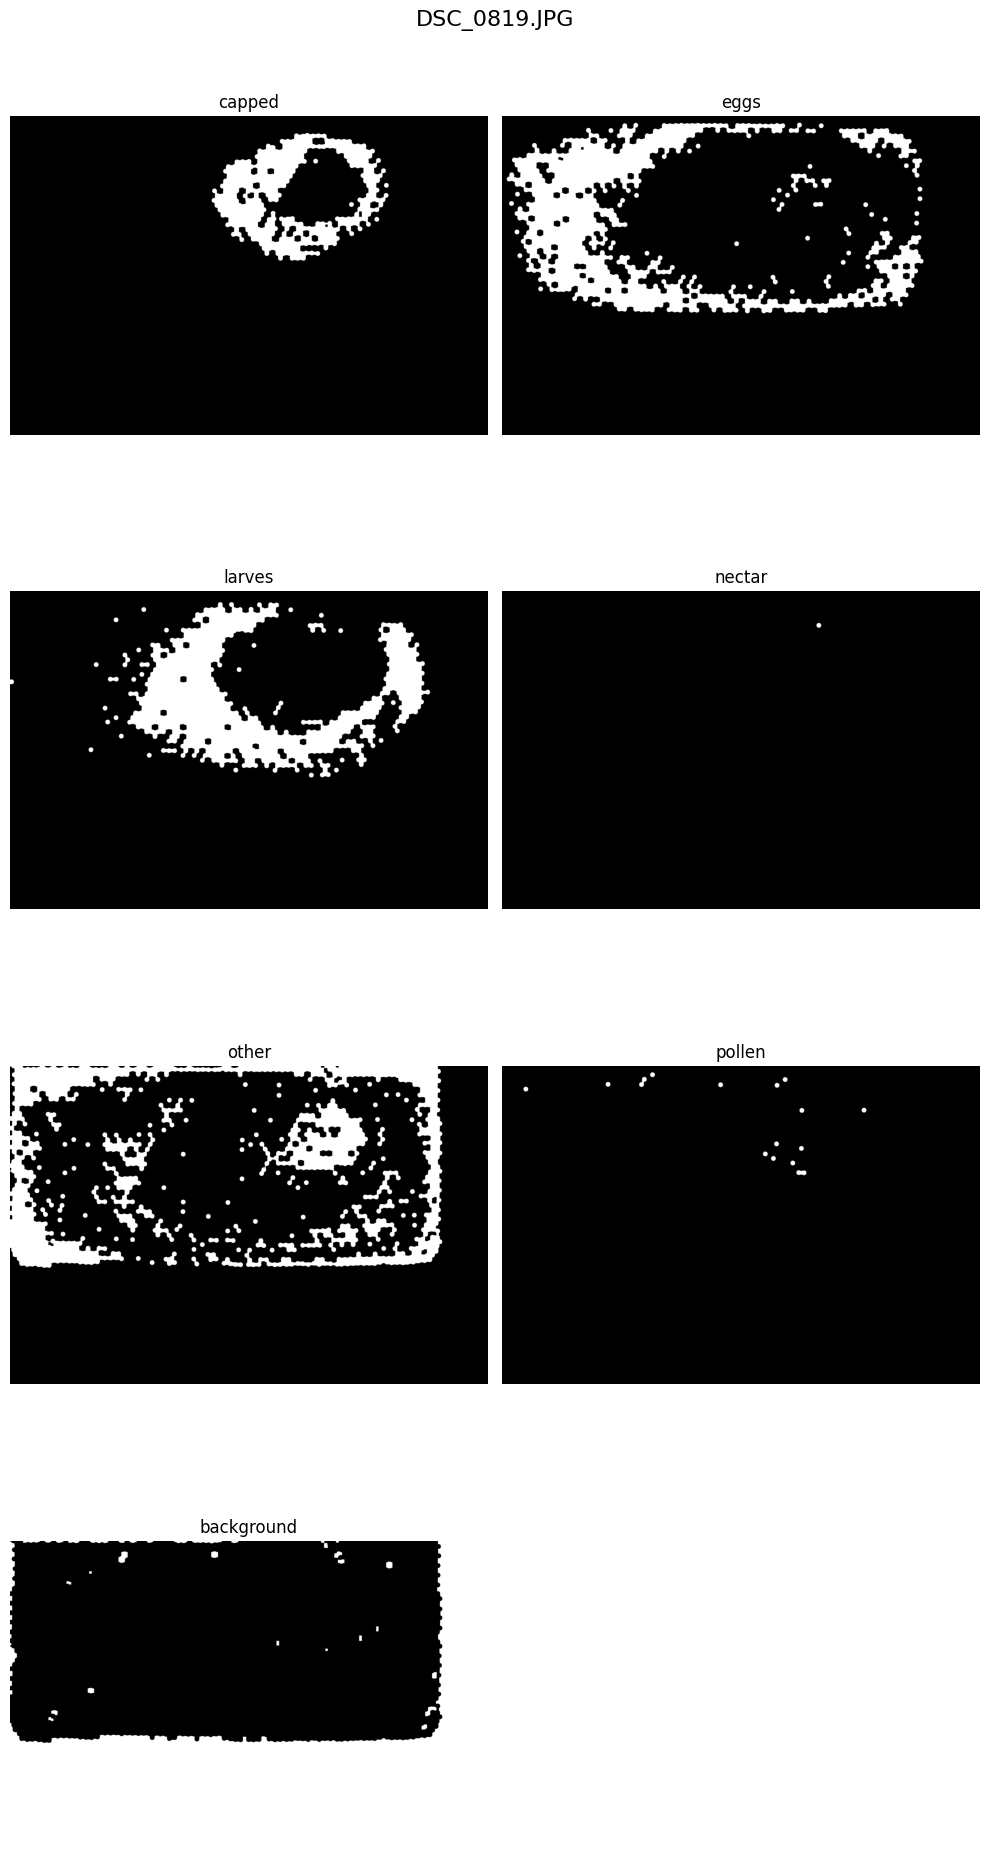

In [9]:
#VERSION 2
import matplotlib.pyplot as plt

# Calculate the number of subplots needed
n = len(masks)

# Calculate the number of rows and columns needed for subplots
rows = n // 2 + n % 2
cols = 2 if n > 1 else 1

# Create a figure for the subplots
fig, axs = plt.subplots(rows, cols, figsize=(10, rows * 5), squeeze=False)

# Set the big title with the filename
fig.suptitle(f'{image_name}', fontsize=16)

# Flatten the axes array
axs = axs.flatten()

# Iterate over the masks
for i, ((image_name, class_name), mask) in enumerate(masks.items(), start=0):
    # Set the title
    axs[i].set_title(f"{class_name}")
    
    # Display the mask
    axs[i].imshow(mask, cmap='gray')
    axs[i].axis('off')

# Remove the unused subplots
if n < len(axs):
    for ax in axs[n:]:
        ax.remove()

plt.tight_layout()
plt.show()

***Saving files to folder***

In [10]:
import os
import matplotlib.pyplot as plt

# Get the current working directory
base_dir = os.getcwd()

# Iterate over each key-value pair in the masks dictionary
for (filename, class_name), mask in masks.items():
    # Create a directory named after the filename if it doesn't exist
    dir_path = os.path.join(base_dir, filename)
    os.makedirs(dir_path, exist_ok=True)

    # Plot the mask
    plt.imshow(mask, cmap='gray')

    # Save the plot as an image file named after the filename and class name
    image_path = os.path.join(dir_path, f'{filename}_{class_name}.png')
    plt.savefig(image_path)

    # Close the plot to free up memory
    plt.close()

***Calculating the white area and percentages***

In [11]:
import numpy as np
import pandas as pd
from IPython.display import display

# Specify the image name
image_name = file_names[index_file_name]

# Create an empty list to store the results
result = []

# Separate the background mask from the other masks
background_mask = None
other_masks = {}

for (filename, class_name), mask in masks.items():
    if filename == image_name:
        if class_name == 'background':
            background_mask = mask
        else:
            other_masks[class_name] = mask

# Check if the background mask was found
if background_mask is not None:
    # Calculate the inverse of the background and the white area
    inverse_background = np.bitwise_not(background_mask)
    inverse_background_white_area = np.sum(inverse_background == 255)

    # Process the other masks
    for class_name, mask in other_masks.items():
        # Calculate the white area of the mask
        mask_white_area = np.sum(mask == 255)

        # Calculate the percentage of white area for the mask with respect to the white area of the inverse background
        percentage = (mask_white_area / inverse_background_white_area) * 100

        # Append the result to the list
        result.append([image_name, class_name, mask_white_area, percentage])

# Convert the list to a DataFrame
result = pd.DataFrame(result, columns=['Image Name', 'Class', 'White Area', 'Percentage'])

# Round the 'Percentage' column to 2 decimal places
result['Percentage'] = result['Percentage'].round(2)

# Display the result
display(result)

,Image Name,Class,White Area,Percentage
0,DSC_0819.JPG,capped,1414032,10.66
1,DSC_0819.JPG,eggs,3622228,27.31
2,DSC_0819.JPG,larves,3031094,22.85
3,DSC_0819.JPG,nectar,2821,0.02
4,DSC_0819.JPG,other,3910584,29.48
5,DSC_0819.JPG,pollen,49104,0.37
